# Assignment 3
## Mike Johnson
### February 10, 2025

****

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load sql extension
%load_ext sql

In [3]:
# Connect to airline_industry.db
%sql sqlite:///airline_industry.db

Connecting to 'sqlite:///airline_industry.db'

In [4]:
%config SqlMagic.displaylimit = None

displaylimit: Value None will be treated as 0 (no limit)

****

#### 1. How many records are in each table in the database?

In [5]:
%%sql

SELECT 
    COUNT(*) AS 'airlines_cnt'
FROM airlines;

Running query in 'sqlite:///airline_industry.db'

airlines_cnt
16


In [6]:
%%sql

SELECT 
    COUNT(*) AS 'airports_cnt'
FROM airports;

Running query in 'sqlite:///airline_industry.db'

airports_cnt
1458


In [7]:
%%sql

SELECT 
    COUNT(*) AS 'flights_cnt'
FROM flights;

Running query in 'sqlite:///airline_industry.db'

flights_cnt
336776


In [8]:
%%sql

SELECT 
    COUNT(*) AS 'planes_cnt'
FROM planes;

Running query in 'sqlite:///airline_industry.db'

planes_cnt
3322


In [9]:
%%sql

SELECT 
    COUNT(*) AS 'weather_cnt'
FROM weather;

Running query in 'sqlite:///airline_industry.db'

weather_cnt
26115


****

#### 2. Did any flights depart and arrive exactly on time?

In [10]:
%%sql

SELECT
    COUNT(*) AS 'on_time_cnt'
FROM flights
WHERE 
    dep_delay = 0
    AND arr_delay = 0;

Running query in 'sqlite:///airline_industry.db'

on_time_cnt
347


Yes, 347 flights departed and arrived on time.

****


#### 3. What is the mean arrival delay among flights?

In [11]:
%%sql

SELECT
    AVG(arr_delay) AS 'mean_arr_delay'
FROM flights;

Running query in 'sqlite:///airline_industry.db'

mean_arr_delay
6.702300639000404


****

#### 4. How many flights had above average arrival delays?

In [12]:
%%sql

SELECT
    COUNT(*) AS 'above_avg_delays'
FROM flights
WHERE arr_delay > (SELECT AVG(arr_delay) AS 'mean_arr_delay'
    FROM flights); 

Running query in 'sqlite:///airline_industry.db'

above_avg_delays
115257


****

#### 5. What is the relationship between temperature and wind speed? Do changes in the mean temperature throughout the year (by month) move reflect changes in mean wind speed?

In [13]:
%%sql q5_result <<

SELECT
    month,
    AVG(temp) AS 'mean_temp',
    AVG(wind_speed) AS 'mean_wind_speed'
FROM weather
GROUP BY month
ORDER BY month;

Running query in 'sqlite:///airline_industry.db'

In [14]:
# Load results into a dataframe.
q5_df = q5_result.DataFrame()
q5_df

,month,mean_temp,mean_wind_speed
0,1,35.635660,11.183658
1,2,34.270597,12.674038
2,3,39.880072,12.923151
3,4,51.745642,11.098444
4,5,61.795000,9.516621
5,6,72.184000,10.263253
6,7,80.066221,9.573477
7,8,74.434876,8.611904
8,9,67.371292,8.906685
9,10,60.071130,9.702033


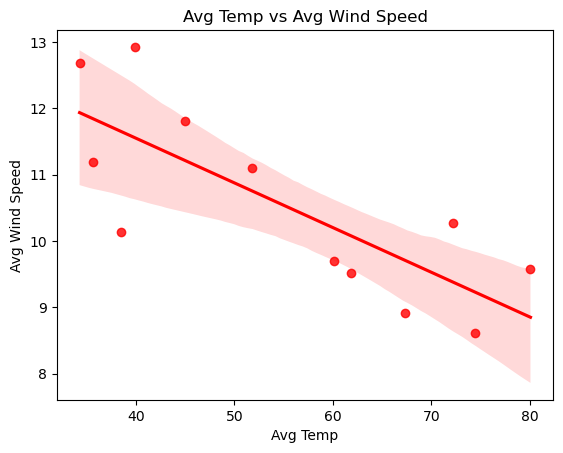

In [15]:
# Visualize results
sns.regplot(data = q5_df,
            x = 'mean_temp',
            y = 'mean_wind_speed',
            color = 'red')

# Viz labels
plt.title('Avg Temp vs Avg Wind Speed')
plt.xlabel('Avg Temp')
plt.ylabel('Avg Wind Speed')

plt.show()          

Yes, as average temperature increases, average windspeed decreases.

****

#### 6. Print the first 5 rows of flights and airlines. Does the flights table contain the full name of the airline? If so, print them. If not, write a query to return the first 10 records in the flights data with the following columns: the origin, destination, carrier, flight number, and full name of the airline for each flight in a single table.

In [16]:
%%sql

SELECT *
FROM flights
LIMIT 5;

Running query in 'sqlite:///airline_industry.db'

field1,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
1,2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2,2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
3,2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
4,2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
5,2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00


In [17]:
%%sql

SELECT *
FROM airlines
LIMIT 5;

Running query in 'sqlite:///airline_industry.db'

field1,carrier,name
1,9E,Endeavor Air Inc.
2,AA,American Airlines Inc.
3,AS,Alaska Airlines Inc.
4,B6,JetBlue Airways
5,DL,Delta Air Lines Inc.


In [18]:
%%sql

SELECT
    f.origin,
    f.dest as 'destination',
    f.carrier,
    f.flight,
    a.name
FROM flights as f
LEFT JOIN airlines as a
ON f.carrier = a.carrier
LIMIT 10;


Running query in 'sqlite:///airline_industry.db'

origin,destination,carrier,flight,name
EWR,IAH,UA,1545,United Air Lines Inc.
LGA,IAH,UA,1714,United Air Lines Inc.
JFK,MIA,AA,1141,American Airlines Inc.
JFK,BQN,B6,725,JetBlue Airways
LGA,ATL,DL,461,Delta Air Lines Inc.
EWR,ORD,UA,1696,United Air Lines Inc.
EWR,FLL,B6,507,JetBlue Airways
LGA,IAD,EV,5708,ExpressJet Airlines Inc.
JFK,MCO,B6,79,JetBlue Airways
LGA,ORD,AA,301,American Airlines Inc.


****

#### 7. Your supervisor is interested in the airlines that offer the most flights in peak periods. Write a query that returns the number of flights each airline operates in December. The results should be a single table that contains five columns: carrier, month, name, and num_flights. The results should be limited to 10 and shown in descending order by number of flights.

In [19]:
%%sql

SELECT
    f.carrier,
    f.month,
    a.name,
    COUNT(*) AS num_flights
FROM flights as f
LEFT JOIN airlines as a
ON f.carrier = a.carrier
WHERE month = 12
GROUP BY 
    f.carrier,
    a.name
ORDER BY num_flights DESC
LIMIT 10;

Running query in 'sqlite:///airline_industry.db'

carrier,month,name,num_flights
UA,12,United Air Lines Inc.,4931
B6,12,JetBlue Airways,4741
EV,12,ExpressJet Airlines Inc.,4307
DL,12,Delta Air Lines Inc.,4093
AA,12,American Airlines Inc.,2705
MQ,12,Envoy Air,2139
9E,12,Endeavor Air Inc.,1633
US,12,US Airways Inc.,1605
WN,12,Southwest Airlines Co.,1099
VX,12,Virgin America,476


****

#### 8. Use pandas to connect to the database. Define a function that takes one argument--month_num--called num_flights_fun that uses pandas' `.read_sql_query()` and runs a query that returns the number of flights each airline operates in whatever month is specified in the function call. The result should be returned as a pandas dataframe that contains five columns: carrier, month, name, and num_flights.

In [20]:
# Define function that takes the month_num and returns the number of flights each airline operates in that month.
def num_flights_fun(month_num):
    # Connection to database
    conn = sqlite3.connect('airline_industry.db')

    # SQL query to get the number of flights each airline operates in the specified month
    query = f"""
    SELECT
        f.carrier,
        f.month,
        a.name,
        COUNT(*) AS num_flights
    FROM flights as f
    LEFT JOIN airlines as a
    ON f.carrier = a.carrier
    WHERE f.month = '{month_num}'
    GROUP BY 
        f.carrier, 
        f.month,
        a.name
    ORDER BY num_flights DESC;
    """

    # Store the result in a dataframe
    result_df = pd.read_sql_query(query, conn)

    # Close db connection
    conn.close()

    # Return the dataframe
    return result_df

****

#### 9. Test your function to ensure it works. Create a new dataframe called sept that contains the results with only records from September and a dataframe called jan that contains the results with only records from January. The only change you should make to get the results is adjusting the value of the input parameter you are passing in the function call in num_flights_fun. Print out the last five rows of sept and jan.

In [21]:
# Verify that function works using September
sept = num_flights_fun(9)

# Show last five rows
sept.tail(5)

,carrier,month,name,num_flights
11,AS,9,Alaska Airlines Inc.,60
12,F9,9,Frontier Airlines Inc.,58
13,YV,9,Mesa Airlines Inc.,42
14,HA,9,Hawaiian Airlines Inc.,25
15,OO,9,SkyWest Airlines Inc.,20


In [22]:
# Verify that  function works using January
jan = num_flights_fun(1)

# Show last five rows
jan.tail(5)

,carrier,month,name,num_flights
11,AS,1,Alaska Airlines Inc.,62
12,F9,1,Frontier Airlines Inc.,59
13,YV,1,Mesa Airlines Inc.,46
14,HA,1,Hawaiian Airlines Inc.,31
15,OO,1,SkyWest Airlines Inc.,1


****

#### 10. Using sept and jan, print the top five airlines with the greatest number of flights in September and in January, in descending order. Are the top five airlines the same in September and January? If so, what are the airlines? If not, which airlines differ from September to January?

In [23]:
# Show top 5 in September
sept.head(5)

,carrier,month,name,num_flights
0,EV,9,ExpressJet Airlines Inc.,4725
1,UA,9,United Air Lines Inc.,4694
2,B6,9,JetBlue Airways,4291
3,DL,9,Delta Air Lines Inc.,3883
4,AA,9,American Airlines Inc.,2614


In [24]:
# Show top 5 in January
jan.head(5)

,carrier,month,name,num_flights
0,UA,1,United Air Lines Inc.,4637
1,B6,1,JetBlue Airways,4427
2,EV,1,ExpressJet Airlines Inc.,4171
3,DL,1,Delta Air Lines Inc.,3690
4,AA,1,American Airlines Inc.,2794


The top 5 airlines in September and January are the same. Both include ExpressJet Airlines Inc., United Air Lines Inc., JetBlue Airways, Delta Air Lines Inc., American Airlines Inc..

****

#### 11. Create a new function using pandas called num_flights_fun_all that runs the same query as above but returns the records for all months. The function should not take any arguments.

In [25]:
# Define function that returns the records for all months
def num_flights_fun_all():
    # Connection to database
    conn = sqlite3.connect('airline_industry.db')

    # SQL query to get the number of flights each airline operates
    query = f"""
    SELECT
        f.carrier,
        f.month,
        a.name,
        COUNT(*) AS num_flights
    FROM flights as f
    LEFT JOIN airlines as a
    ON f.carrier = a.carrier
    GROUP BY 
        f.carrier, 
        f.month,
        a.name
    ORDER BY num_flights DESC;
    """

    # Store the result in a dataframe
    result_df = pd.read_sql_query(query, conn)

    # Close db connection
    conn.close()

    # Return the dataframe
    return result_df

****

#### 12. Use num_flights_fun_all to create a dataframe called months_df. The dataframe should have carrier, month, name, and num_flights columns and contain the number of flights that each airline made in each month. Show the first 15 lines of the dataframe to ensure the results are correct.

In [26]:
# Run num_lights_fun_all() and save to months_df
months_df = num_flights_fun_all()

# Show the first 15 lines of dataframe to confirm function worked.
months_df.head(15)

,carrier,month,name,num_flights
0,UA,8,United Air Lines Inc.,5124
1,UA,7,United Air Lines Inc.,5066
2,UA,10,United Air Lines Inc.,5060
3,UA,4,United Air Lines Inc.,5047
4,B6,7,JetBlue Airways,4984
5,UA,6,United Air Lines Inc.,4975
6,UA,3,United Air Lines Inc.,4971
7,UA,5,United Air Lines Inc.,4960
8,B6,8,JetBlue Airways,4952
9,UA,12,United Air Lines Inc.,4931


****

#### 13. Use months_df to plot the number of flights each airline made for each month using altair, plotly, or seaborn.

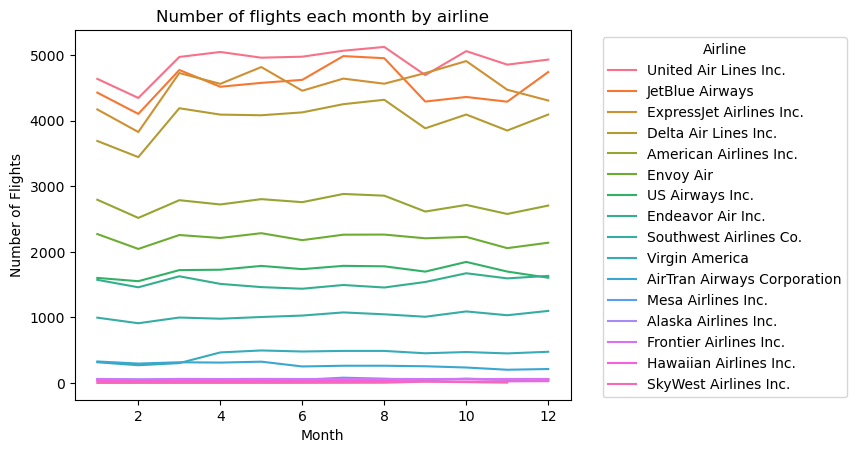

In [27]:
# Create viz
sns.lineplot(data = months_df,
             x = 'month',
             y = 'num_flights',
             hue = 'name')

# Viz labels
plt.title('Number of flights each month by airline')
plt.xlabel('Month')
plt.ylabel('Number of Flights')
plt.legend(title = 'Airline', bbox_to_anchor=(1.05, 1), loc = 'upper left')

plt.show()

****

#### 14. Write a query that returns the each airlines' mean arrival delay across all of its flights. The result should have two columns: mean_delay and the full name of the airline. Which airline has the highest average delay?

In [28]:
%%sql

SELECT 
    avg(f.arr_delay) AS mean_delay,
    a.name
FROM flights AS f
LEFT JOIN airlines AS a
ON f.carrier = a.carrier
GROUP BY a.name
ORDER BY mean_delay DESC
LIMIT 1;

Running query in 'sqlite:///airline_industry.db'

mean_delay,name
21.792700729927006,Frontier Airlines Inc.


****

#### 15. Use pandas to query the data and return a dataframe to plot the data. Use either altair, seaborn, or plotly and plot the mean delay for each airline in a bar plot. The plot should have the airline name on the y and mean delay on the x and be ordered by mean delay. The bars should be colored by whether the airlines' flights arrive, on average, early or late. Which airline, on average, has the earliest arrivals?

In [29]:
# Connection to database
conn = sqlite3.connect('airline_industry.db')

    # SQL query to get the number of flights each airline operates
query = f"""
        SELECT 
            avg(f.arr_delay) AS mean_delay,
            a.name
        FROM flights AS f
        LEFT JOIN airlines AS a
        ON f.carrier = a.carrier
        GROUP BY a.name
        ORDER BY mean_delay;
        """

q15_df = pd.read_sql_query(query, conn)

# Close db connection
conn.close()

# Add conditional column to indicate wheter flights arrive early or late on average.
q15_df['status'] = np.where(q15_df['mean_delay'] < 0, 'early', 'late')

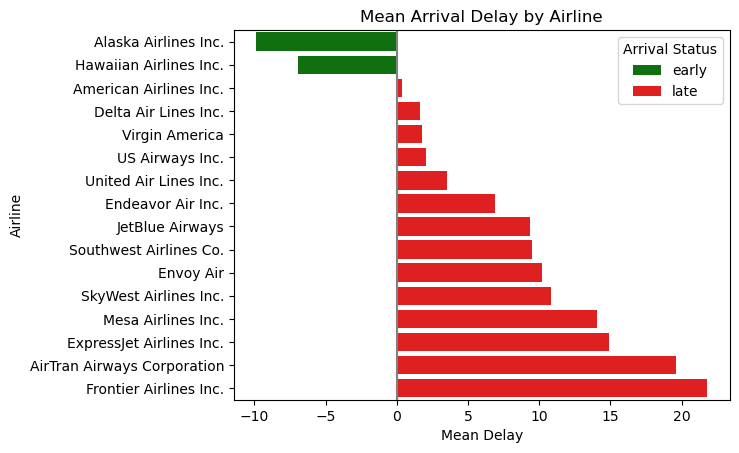

In [30]:
# Create viz
sns.barplot(data = q15_df,
            x = 'mean_delay',
            y = 'name',
            hue = 'status',
            palette={'early':'green', 'late':'red'})

# Viz labels
plt.title('Mean Arrival Delay by Airline')
plt.xlabel('Mean Delay')
plt.ylabel('Airline')
plt.axvline(0, color = 'gray')
plt.legend(title = 'Arrival Status')

plt.show()

In [31]:
# Airline with the earliest arrivals on average.
q15_df.head(1)

,mean_delay,name,status
0,-9.861345,Alaska Airlines Inc.,early


****